<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Regresión Polinómica

Tiempo estimado: **15 minutos**

## Objetivos

Después de completar este laboratorio, podrás:

* Usar **scikit-learn** para implementar una **Regresión Polinómica**.
* Crear un modelo, entrenarlo, probarlo y utilizarlo.


<h1>Tabla de contenidos</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#download_data">Descarga de datos</a></li>
        <li><a href="#polynomial_regression">Regresión polinómica</a></li>
        <li><a href="#evaluation">Evaluación</a></li>
        <li><a href="#practice">Práctica</a></li>
    </ol>
</div>
<br>
<hr>


### Importación de los paquetes necesarios



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


<h2 id="download_data">Descarga de datos</h2>  

Para descargar los datos, utilizaremos **!wget** para obtenerlos desde **IBM Object Storage**.


In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2025-11-07 18:29:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2025-11-07 18:29:55 (723 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Comprensión de los datos

### `FuelConsumption.csv`

Hemos descargado un conjunto de datos sobre el **consumo de combustible**, llamado **`FuelConsumption.csv`**, que contiene las valoraciones específicas por modelo sobre el consumo de combustible y las emisiones estimadas de dióxido de carbono de los nuevos vehículos ligeros a la venta en Canadá.
📊 [Fuente del conjunto de datos](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

* **MODELYEAR** → Año del modelo, por ejemplo: *2014*
* **MAKE** → Marca, por ejemplo: *Acura*
* **MODEL** → Modelo, por ejemplo: *ILX*
* **VEHICLE CLASS** → Clase de vehículo, por ejemplo: *SUV*
* **ENGINE SIZE** → Tamaño del motor (L), por ejemplo: *4.7*
* **CYLINDERS** → Número de cilindros, por ejemplo: *6*
* **TRANSMISSION** → Tipo de transmisión, por ejemplo: *A6*
* **FUEL CONSUMPTION in CITY (L/100 km)** → Consumo en ciudad, por ejemplo: *9.9*
* **FUEL CONSUMPTION in HWY (L/100 km)** → Consumo en autopista, por ejemplo: *8.9*
* **FUEL CONSUMPTION COMB (L/100 km)** → Consumo combinado, por ejemplo: *9.2*
* **CO2 EMISSIONS (g/km)** → Emisiones de CO₂, por ejemplo: *182* → valores más bajos indican menores emisiones.


## Lectura de los datos


In [4]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Vamos a seleccionar algunas características que queremos usar para realizar la regresión.


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


A continuación, representaremos los valores de **emisiones** en función del **tamaño del motor**:


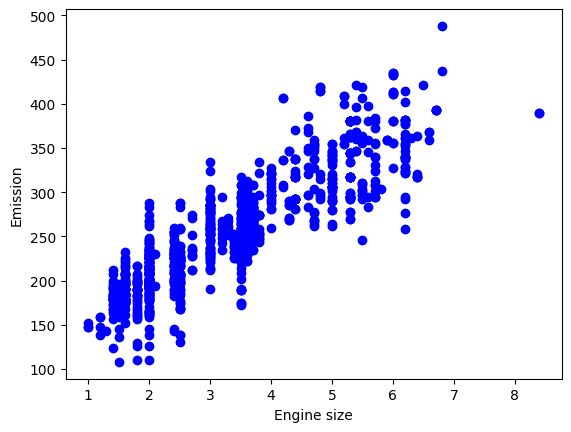

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creación del conjunto de entrenamiento y prueba

La **división Train/Test** consiste en separar el conjunto de datos en dos subconjuntos:

* **Conjunto de entrenamiento**, que se utiliza para ajustar (entrenar) el modelo.
* **Conjunto de prueba**, que se usa posteriormente para evaluar el rendimiento del modelo.

Ambos conjuntos son **mutuamente excluyentes** (no comparten datos).

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Regresión polinómica</h2>


A veces, la tendencia de los datos no es lineal, sino **curva**.
En estos casos, podemos utilizar **métodos de regresión polinómica**.

De hecho, existen muchos tipos de regresiones que pueden ajustarse a la forma que tenga el conjunto de datos: cuadrática, cúbica, etc., y así sucesivamente hasta infinitos grados.

En esencia, todas ellas se denominan **regresión polinómica**, donde la relación entre la variable independiente (x) y la variable dependiente (y) se modela como un **polinomio de grado n** en (x).

Por ejemplo, si queremos realizar una **regresión polinómica de segundo grado**, la ecuación sería:

$$y = b + \theta_1 x + \theta_2 x^2$$

---

Ahora bien, ¿cómo podemos ajustar nuestros datos a esta ecuación si solo tenemos los valores de (x), como por ejemplo **Engine Size** (tamaño del motor)?
Podemos **crear nuevas características** derivadas de (x):
1, (x) y (x^2).

---

La función **`PolynomialFeatures()`** de la librería **Scikit-learn** genera un nuevo conjunto de características a partir del original.
Es decir, crea una **matriz con todas las combinaciones polinómicas** de las variables originales, hasta el grado especificado.

Por ejemplo, si el conjunto de datos original tiene una sola característica, *ENGINESIZE*, y seleccionamos un **grado 2**, se generan tres características correspondientes a los grados 0, 1 y 2:

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**`fit_transform`** toma nuestros valores de (x) y devuelve una lista de datos elevados desde la potencia 0 hasta la potencia 2 (ya que el grado del polinomio se ha fijado en 2).

La ecuación y un ejemplo se muestran a continuación:

$$
\begin{bmatrix}
v_1\\\
v_2\\
\vdots\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
[ 1 & v_1 & v_1^2]\\
[ 1 & v_2 & v_2^2]\\
\vdots & \vdots & \vdots\\
[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\
2.4\\
1.5\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
[ 1 & 2. & 4.]\\
[ 1 & 2.4 & 5.76]\\
[ 1 & 1.5 & 2.25]\\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$


Parece un conjunto de características para un análisis de **regresión lineal múltiple**, ¿verdad?
Sí, lo es.

De hecho, la **regresión polinómica** es un **caso especial de la regresión lineal**, cuya principal diferencia radica en cómo seleccionamos las características.
Si sustituimos (x) por (x_1) y (x^2) por (x_2), la ecuación de segundo grado se convierte en:

$$y = b + \theta_1 x_1 + \theta_2 x_2$$

De este modo, podemos tratar el problema como una **regresión lineal múltiple**.
Por tanto, la regresión polinómica puede considerarse un **caso particular** de la regresión lineal tradicional, y puede resolverse **con los mismos mecanismos**.

---

Así que podemos utilizar la función **`LinearRegression()`** para resolverlo.

In [9]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.86325931 -1.28245253]]
Intercept:  [109.6177714]


Como se mencionó antes, el **coeficiente** y el **intercepto** son los parámetros de la curva ajustada.
Dado que se trata de una regresión lineal múltiple típica, con tres parámetros, y sabiendo que estos son el intercepto y los coeficientes del hiperplano, **scikit-learn** los estima a partir de nuestro nuevo conjunto de características.
A continuación, podemos representarlo gráficamente.

Text(0, 0.5, 'Emission')

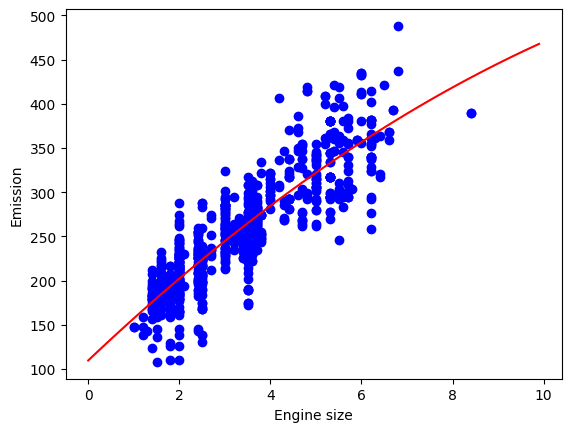

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluación</h2>


In [11]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.30
Residual sum of squares (MSE): 819.73
R2-score: 0.78


<h2 id="practice">Práctica</h2>

Prueba a realizar una **regresión polinómica** con el mismo conjunto de datos, pero esta vez con un **grado tres (cúbico)**.

¿Obtienes una mejor precisión?


Coefficients:  [[ 0.         30.27533867  4.11049488 -0.4659129 ]]
Intercept:  [128.80797775]
Mean absolute error: 25.13
Residual sum of squares (MSE): 1107.35
R2-score: 0.72


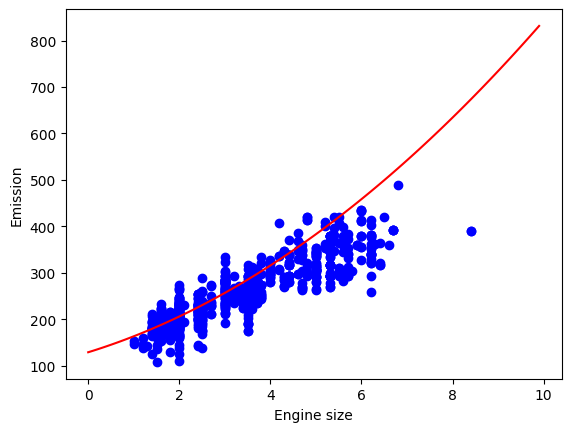

In [ ]:
#importamos los datos y los preparamos 
df = pd.read_csv("FuelConsumption.csv")
df = df.drop_duplicates()
df.isnull()
df.head()

#Creamos un nuevo dataframe para no modificar el original(seleccionamos solo algunas columnas, no todo el dataset)
cdf2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf2.head(9)

# Crear una transformación polinómica de grado 3 (Antes de eso sacamos datos para entrenamiento y para test)
msk = np.random.rand(len(df)) < 0.8
train = cdf2[msk]
test = cdf2[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Esto amplía las características (x, x², x³) para permitir un ajuste no lineal
# Aplicar la transformación a los datos de entrenamiento

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly
# Crear un modelo de regresión lineal (aunque se use con datos polinómicos)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

# Entrenar el modelo con los datos transformados
# El modelo aprende los coeficientes para los términos x, x² y x³

# Mostrar los coeficientes y el término independiente del modelo ajustado


# Dibujar los puntos originales (tamaño del motor vs emisiones de CO₂)
# Crear una secuencia de valores para el eje X (de 0.0 a 10.0 con paso 0.1)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")


# Calcular la predicción del modelo polinómico para esos valores XX
# (usando la ecuación: a0 + a1*x + a2*x² + a3*x³)


# Dibujar la curva de ajuste (línea roja)


# Transformar los datos de prueba con el mismo modelo polinómico
# Obtener las predicciones del modelo sobre el conjunto de prueba
# Calcular y mostrar las métricas de evaluación
# MAE: error absoluto medio, MSE: error cuadrático medio, R²: calidad del ajuste
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )






<h2>¿Quieres aprender más?</h2>

**IBM SPSS Modeler** es una completa plataforma de análisis que incluye numerosos algoritmos de aprendizaje automático.
Está diseñada para incorporar inteligencia predictiva a las decisiones tomadas por individuos, equipos o sistemas dentro de una empresa.
Puedes acceder a una **prueba gratuita** desde este curso:
👉 [SPSS Modeler](https://www.ibm.com/analytics/spss-statistics-software?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork)

También puedes utilizar **Watson Studio** para ejecutar estos notebooks más rápido y con conjuntos de datos más grandes.
Watson Studio es la principal solución en la nube de IBM para científicos de datos, desarrollada por científicos de datos.
Incluye **Jupyter Notebooks**, **RStudio**, **Apache Spark** y las librerías más populares ya preinstaladas en la nube, lo que permite colaborar en proyectos sin necesidad de instalar nada.
Únete a su comunidad con una cuenta gratuita en:
👉 [Watson Studio](https://www.ibm.com/cloud/watson-studio?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork)

### ¡Gracias por completar este laboratorio!

## Autor

**Saeed Aghabozorgi**

### Otros colaboradores

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Traducción

<a href="https://www.linkedin.com/in/carlostessier/" target="_blank">Carlos Tessier</a>

---

<h3 align="center">© IBM Corporation 2025. Todos los derechos reservados.</h3>
